# Stock Market Capstone Project


This is the capstone project inspired by the course  [Python for DataScience and Machine Learning](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/).

In this project, I will discover how bank stocks behave differently during [2020 stock market crash](https://finance.yahoo.com/). The data from six US bank stocks are obtained directly from [Yahoo Finance](https://finance.yahoo.com/) between Jan. 2020 to Dec. 2021. 
Data are for stock prices of the following banks:
* Bank of America (BAC)
* CitiGroup (C)
* Goldman Sachs (GS)
* JPMorgan Chase (JPM)
* Morgan Stanley (MS)
* Wells Fargo (WFC)

#### Observations

* Bank of America, JPMorgan Chase, Goldman Sachs, and Morgan Stanley have similiar performance.
* Bank of America and Mogran Stanley are the only two stocks with no negative monthly return during 2020Q2 - 2021Q4.
* CitiGroup stock has been volatile in 2020 and 2021 and it records high losses and gains.
* Wells Fargo was the last to recover after Covid market crash.

#### Hypothesis 
* Bank of America is a good stock to buy as it shows a solid (low risk) performace after Covid but the short-term return might not be the best.  
* For those who prefer diverse portfolio, Wells Fargo should be a good choice since the stock behavior is different with those of Bank of America, JPMorgan Chase, Goldman Sachs, and Morgan Stanley.
* CitiGroup is appropriate for short-term (high risk) traders as they can enjoy high gains with high risks.  

**Note that the hypothesis is consistent with the stocks' trading volume as BAC, WFC, and C are the top stocks with most trading volumes**

In [357]:
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
sns.set_style('whitegrid')
# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()
import statistics

%matplotlib inline

In [366]:
# first we collect data from yahoo.com and put all 
# data into a multi-index datarame, called bank_stocks

BAC = data.DataReader("BAC", 'yahoo', '01-01-2020', '31-12-2021')
C = data.DataReader("C", 'yahoo', '01-01-2020', '31-12-2021')
GS =  data.DataReader("GS", 'yahoo', '01-01-2020', '31-12-2021')
JPM = data.DataReader("JPM", 'yahoo', '01-01-2020', '31-12-2021')
MS = data.DataReader("MS", 'yahoo', '01-01-2020', '31-12-2021')
WFC = data.DataReader("WFC", 'yahoo', '01-01-2020', '31-12-2021')
tickers = "BAC GS C JPM MS WFC".split(' ')
tickers.sort()
bank_stocks=pd.concat([BAC,C, GS, JPM, MS, WFC],axis = 1,keys = tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2020-01-02   35.660000  35.290001  35.349998  35.639999  37614200.0   
2020-01-03   35.150002  34.759998  34.980000  34.900002  50357900.0   
2020-01-06   34.900002  34.369999  34.410000  34.849998  42185000.0   
2020-01-07   34.919998  34.529999  34.700001  34.619999  34149000.0   
2020-01-08   35.189999  34.549999  34.570000  34.970001  45311600.0   

Bank Ticker                     C                                   ...  \
Stock Info   Adj Close       High        Low       Open      Close  ...   
Date                                                                ...   
2020-01-02   34.053570  81.260002  80.029999  80.129997  81.230003  ...   
2020-01-03   33.346508  80.519997  79.449997  79.800003  79.699997  ...   
2020-01-06   33.298733  79.550003  78.720001  78.720001  79.449997  ...   
2020-01-07   33.078968  79.300003  78.730003  79.290001  78.760002  ...   
2020-01-08   33.413399  80.000000  78.680000  78.769997  79.360001  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2020-01-02   51.200001  52.040001  7808000.0  49.343578  54.040001  53.509998   
2020-01-03   51.220001  51.200001  6706000.0  48.547100  53.619999  52.900002   
2020-01-06   50.669998  51.020000  7476700.0  48.376431  53.200001  52.720001   
2020-01-07   51.040001  50.919998  4538100.0  48.281609  53.049999  52.470001   
2020-01-08   50.959999  51.570000  6185200.0  48.897930  53.330002  52.799999   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2020-01-02   53.849998  53.750000  16803100.0  50.977921  
2020-01-03   53.110001  53.419998  15608800.0  50.664944  
2020-01-06   52.740002  53.099998  13200300.0  50.361446  
2020-01-07   53.049999  52.660000  13278600.0  49.944141  
2020-01-08   52.840000  52.820000  16585600.0  50.095886  

[5 rows x 36 columns]

#### First, let's see the stock prices over time

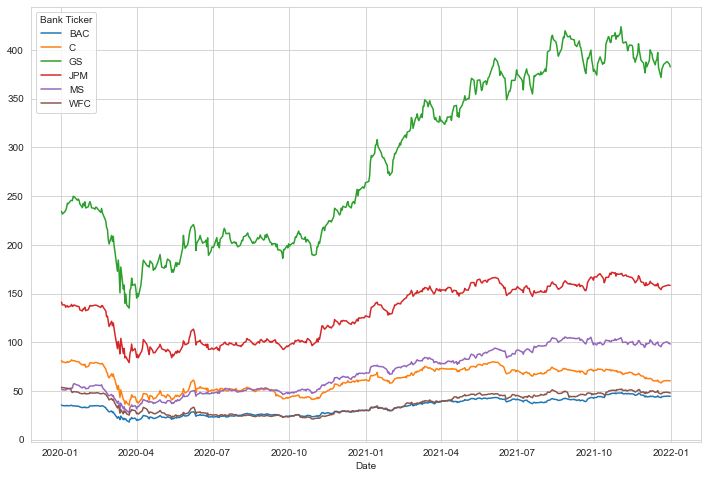

In [469]:
plt.figure (figsize=(12,8))
sns.lineplot(data = bank_stocks.xs('Close', axis = 1, level = 1),dashes=False);

#### To find how each bank performed, we calculate the return rate, which is the day-to-day change in the stock price (%)

In [369]:
# in order to find how the prices change day to day, we define a 
# dataframe, called returns, which find the return of stock at each day

returns = pd.DataFrame()
for j in tickers:
    returns [j] = bank_stocks[j]['Close'].pct_change()
    
returns.iloc[0,:]=0;
returns = returns*100

#### First, we check if the return datafram is working as expected

In [370]:
returns.idxmin()

BAC   2020-03-16
C     2020-03-16
GS    2020-03-16
JPM   2020-03-16
MS    2020-03-16
WFC   2020-03-12
dtype: datetime64[ns]

It seems that most of banks had the lowest return happened on March 12, and March 16th, 2020. We searched these two dates and found [this link](https://www.thebalance.com/fundamentals-of-the-2020-market-crash-4799950) 

*The stock market crash of 2020 began on Monday, March 9, with history’s largest point plunge for the Dow Jones Industrial Average (DJIA) up to that date. It was followed by two more record-setting point drops on March 12 and March 16*

So, our results make sense

In [371]:
returns.idxmax()

BAC   2020-03-13
C     2020-03-13
GS    2020-03-13
JPM   2020-03-13
MS    2020-03-13
WFC   2020-03-24
dtype: datetime64[ns]

Most of the banks had the best return date only one day after their worst. This observation makes sense and so we can continue.

#### We expect 2020 to be volatile for the stocks and so dig more into returns in 2020 by obtaining the descriptive statistics for the returns in 2020 (results are in %) + box plot

In [377]:
returns_stat = returns.mean().rename_axis('Bank Ticker').reset_index(name='mean')
returns_stat.loc [:,'min'] = np.array(returns.min())
returns_stat.loc [:,'1st quartile'] = np.array(returns.apply(lambda x: np.percentile(x,25)))
returns_stat.loc [:,'median'] = np.array(returns.median())
returns_stat.loc [:,'3rd quartile'] = np.array(returns.apply(lambda x: np.percentile(x,75)))
returns_stat.loc [:,'max'] = np.array(returns.max())
returns_stat.loc [:,'standard deviation'] = np.array(returns.std())
returns_stat.sort_values(['mean','median'], ascending=False)

,Bank Ticker,mean,min,1st quartile,median,3rd quartile,max,standard deviation
4,MS,0.164717,-15.600001,-1.071249,0.151576,1.397431,19.770044,2.806081
2,GS,0.130341,-12.705308,-1.169343,0.015397,1.353532,17.580307,2.582322
0,BAC,0.084234,-15.397348,-1.236945,0.091043,1.417464,17.796195,2.847391
3,JPM,0.056523,-14.964876,-1.091177,-0.036011,1.225302,18.012493,2.602202
5,WFC,0.026083,-15.867618,-1.483800,0.079644,1.470032,14.534654,3.115356
1,C,-0.006591,-19.298593,-1.411810,-0.063488,1.419804,17.984288,3.218798


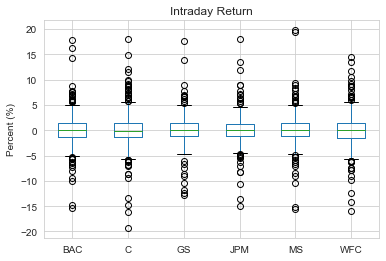

In [390]:
returns.boxplot();
plt.ylabel('Percent (%)');
plt.title('Intraday Return');


* Statistics for intraday returns show that MS, GS, and BAC have better preformances since they have better statistics.  
* C also is shown to have the least stability (highest standard deviation)

#### Now, we repeat the same procedure for quarter returns

In [397]:
quarter_returns = pd.DataFrame()
for j in tickers:
    quarter_returns [j] = bank_stocks[j]['Close'].resample('Q').ffill().pct_change()
    
quarter_returns.iloc[0,:]=0;
quarter_returns = quarter_returns*100
quarter_returns.reset_index(inplace=True)
quarter_returns.loc[:,'Date'] = \
pd.to_datetime(quarter_returns.reset_index()["Date"], dayfirst=True).dt.to_period('Q').dt.strftime('%Yq%q')
quarter_returns.set_index('Date',inplace=True)

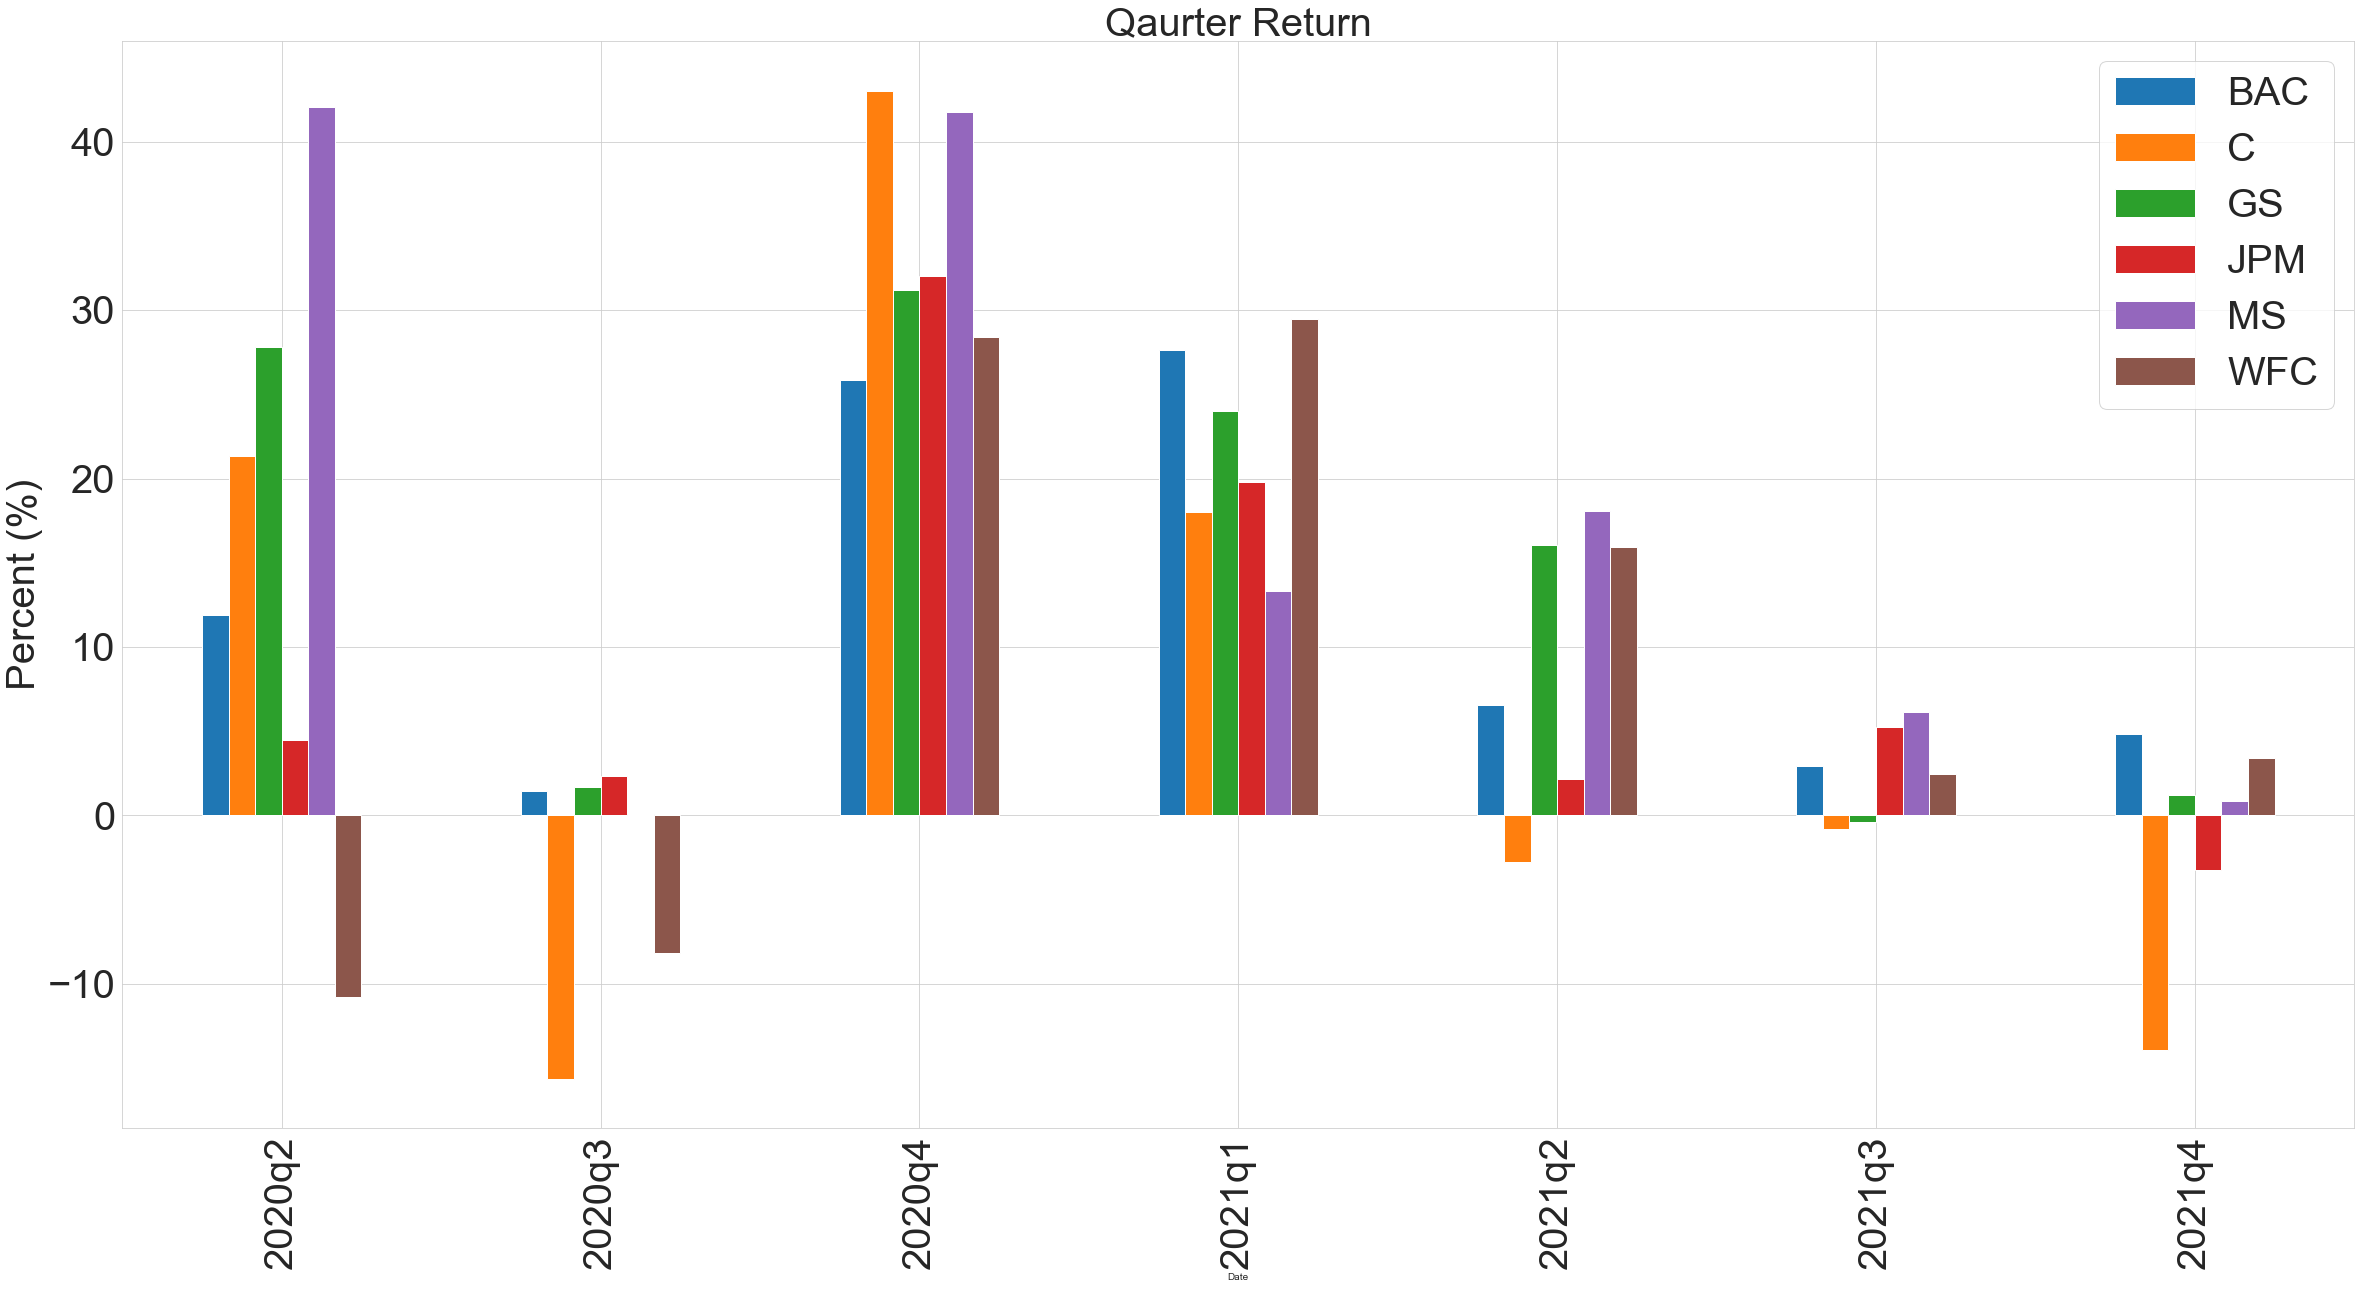

In [402]:
quarter_returns['2020q2':'2022q1'].plot.bar(figsize=(40, 20));
plt.legend(fontsize = 40);
plt.xticks(fontsize = 40);
plt.yticks(fontsize = 40);
plt.title('Qaurter Return',fontsize = 40);
plt.ylabel('Percent (%)',fontsize = 40);

* The figure again confirms the volatility in stock "C" as the stock shows high gain and loss (see 2020q3 and Nov 2020q4, for example). 
* It also seems to take the most for WFC to recover as it does not record a positive return until 2020q4 (it shows highs returns afterwards though). 
*MS and BAC do not have negative returns.


#### Now, I want to compare the trading volume for the stocks. 

In [451]:
Volume = bank_stocks.xs(key = 'Volume', level = 'Stock Info', axis = 1)
Volume.reset_index(inplace=True)
Volume ['Date'] = \
np.array(Volume["Date"].dt.to_period('Q').dt.strftime('%Yq%q'))
Volume.set_index('Date',inplace=True)

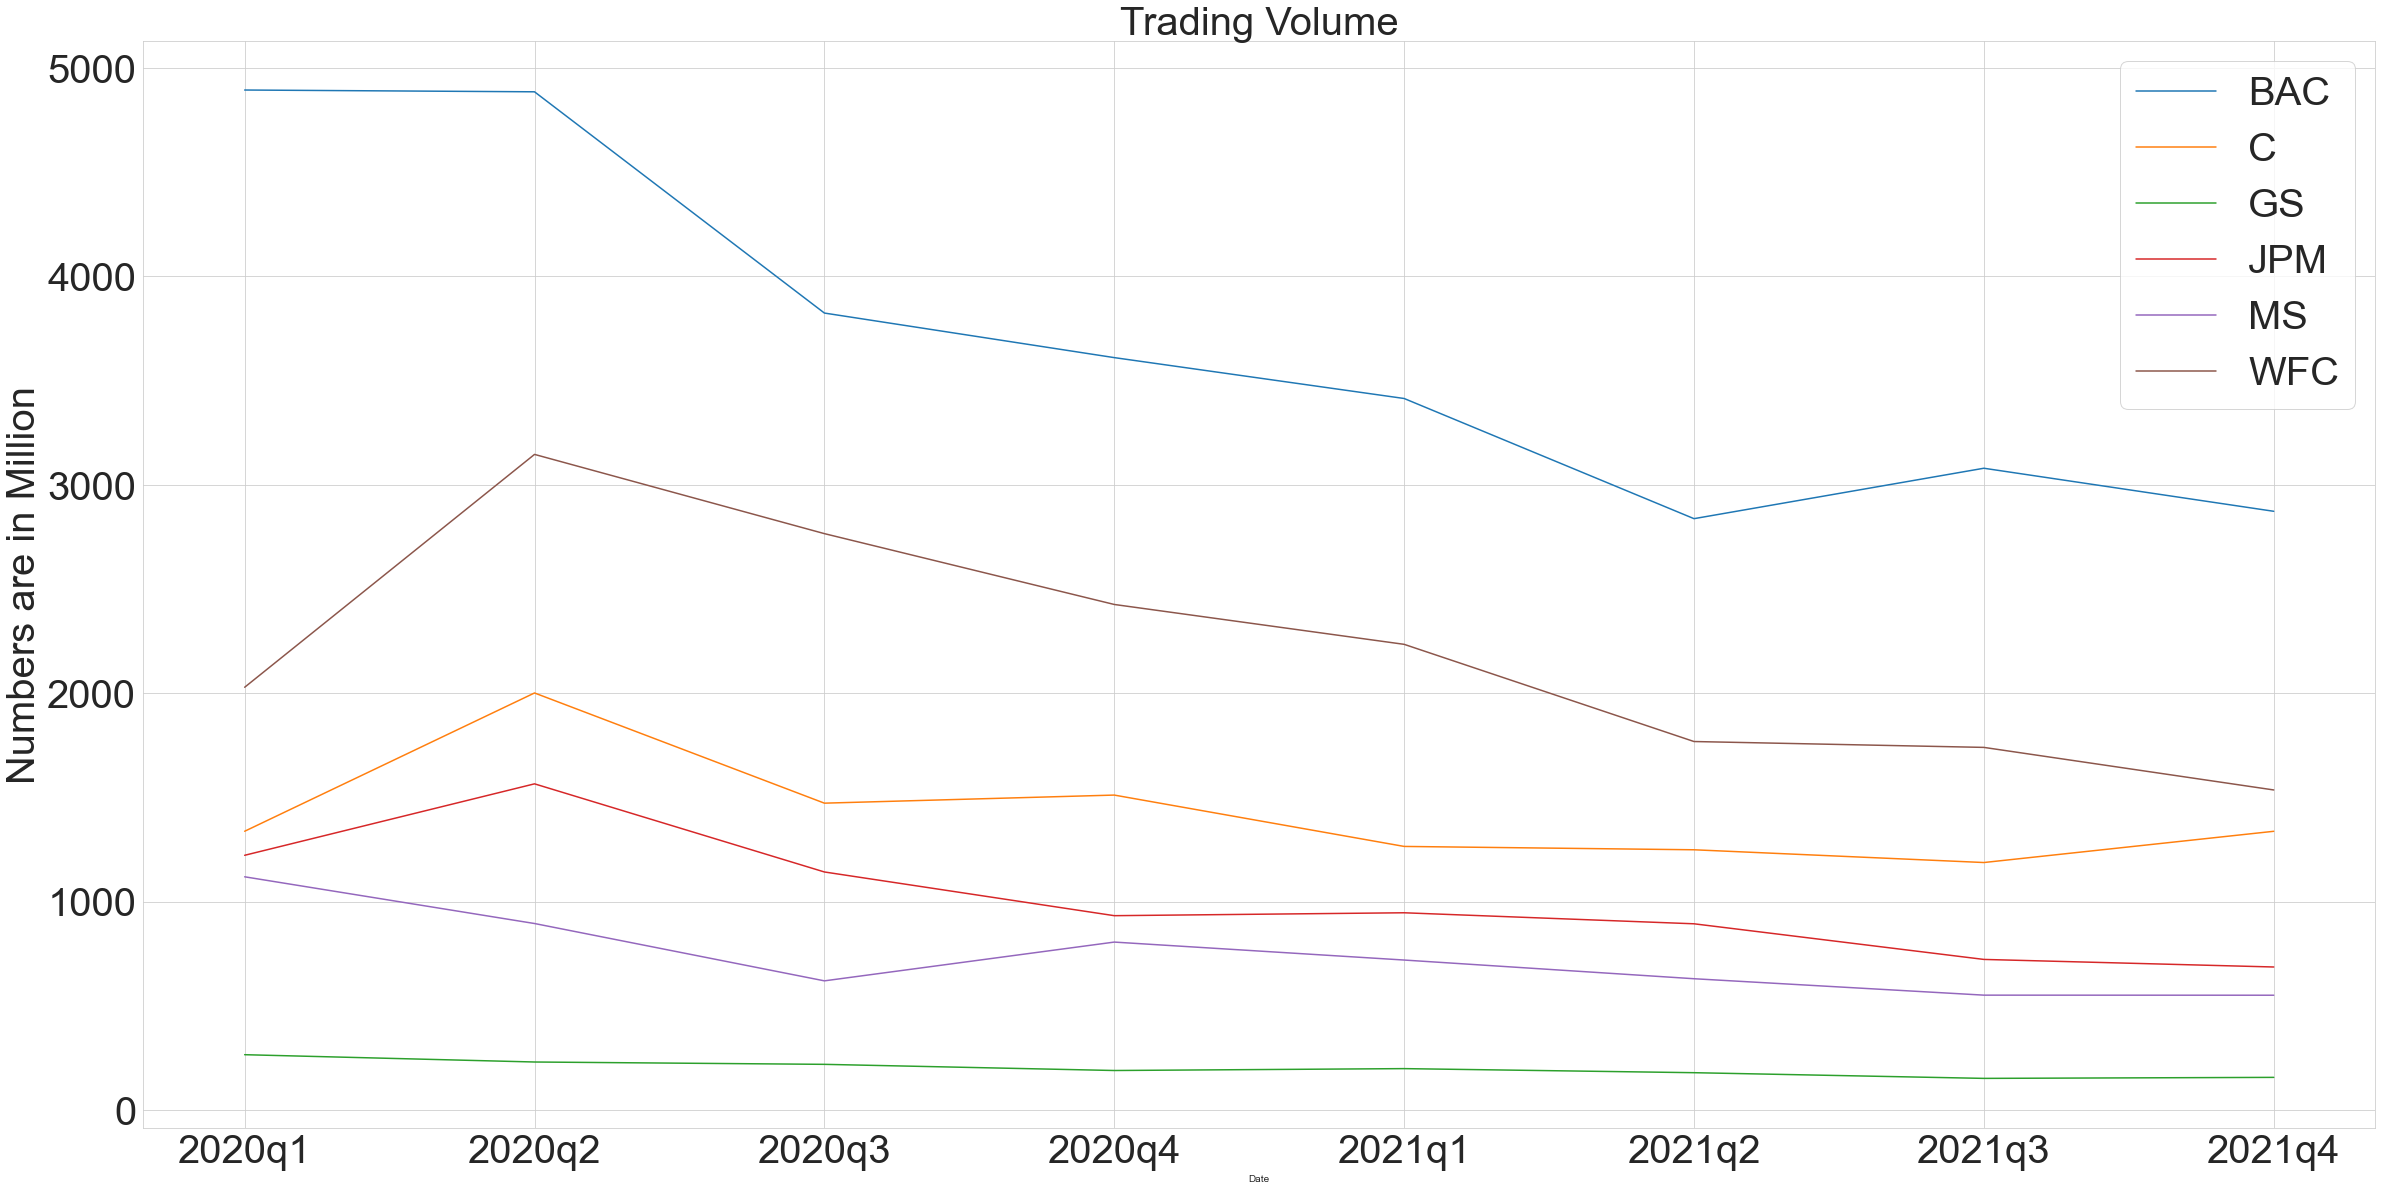

In [461]:
(Volume.groupby('Date').sum()/1000000).plot(figsize = (40,20))
plt.legend(fontsize = 40);
plt.xticks(fontsize = 40);
plt.yticks(fontsize = 40);
plt.title('Trading Volume',fontsize = 40);
plt.ylabel('Numbers are in Million',fontsize = 40);

The figures show the trading volume for the stocks, or the liquidity of the stocks. Basically, the stocks with low trading volume are less liquefiable. In general, the figure shows that after Covid, the bank stocks are decreasing popularity which makes sense. 

* The figure shows GS and MS stocks have the least trading volumes, indicating that they are mainly owned by long-term investors who do not frequently trade. 
* In contrast, BAC, WFC, and C are highly liquefiable which indicates their popularity in 2020-2021. 

#### Finally, I am analyzing if there is a *correlation* between bank stock

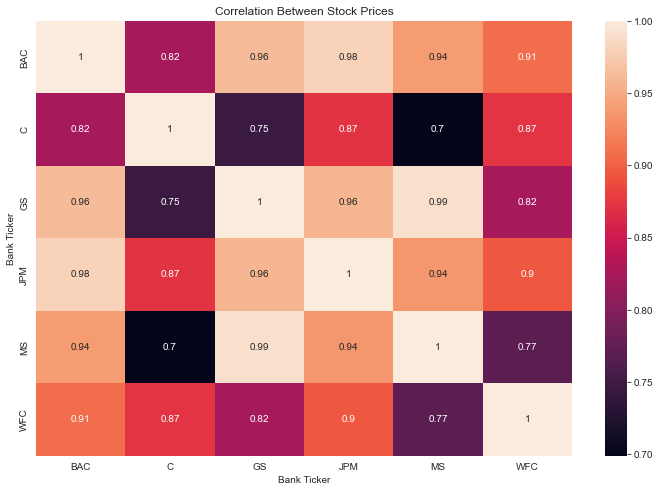

In [466]:
plt.figure(figsize=(12,8))
A1 = sns.heatmap(bank_stocks.xs('Close',level = 1,axis = 1).corr(),annot=True)
A1.set(title = 'Correlation Between Stock Prices')
plt.show()


* The results show that there is a good correlation between the stocks (>0.70): Ther results show that C has the least correlation with other stocks and that confirms the volatility of the stock.
* BAC, JPM, GS, and MS have correlations more than 0.9 (highly correlated)